<a href="https://colab.research.google.com/github/malgorzata-p/Amazon-Alexa-Reviews/blob/master/Prediction_of_Customer_Revenue_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem: The marketing team is planning to allocate the budget to several marketig channels.
Consider each channel effectiveness and calculate how much should they spend on email, social media, offline promotions and paid search.




Solution: Model the relationship between channel spends and sales 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


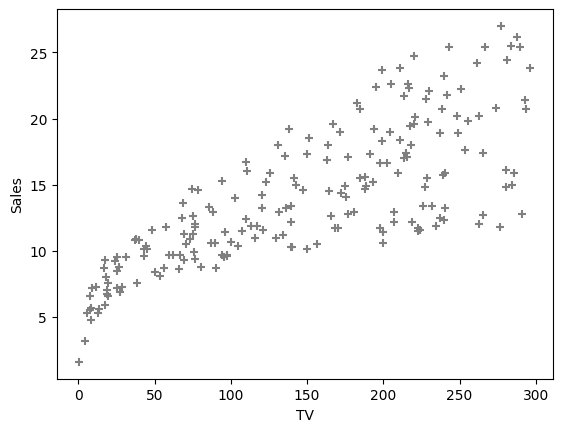

In [21]:
plt.scatter(df['TV'],df['sales'],
            marker="+", color='gray')
plt.xlabel('TV')
plt.ylabel('Sales');
#close association between TV spend and sales

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(df[['TV']],df[['sales']])

LinearRegression()

In [25]:
sales_pred = model.predict(df[['TV']])

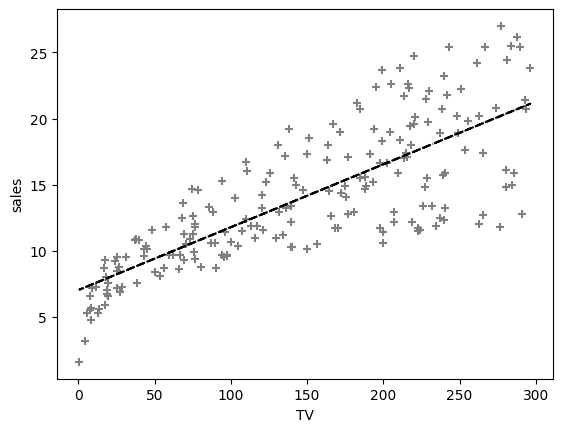

In [26]:
plt.plot(df.TV, sales_pred,'k--')
plt.scatter(df.TV, df.sales,
            marker='+', color='gray')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()
#simple linear regression describes well the relationship between sales and TV spend

Feature Engineering

Problem: Find high-value customers, who are expected to brind the highest revenue and create a distinct marketing strategy for them

Solution: Create a model that predicts next year revenue based on previous year purchases and identify customers with higher predicted revenue/value

In [27]:
transactions = pd.read_csv('azra_retail_transactions.csv')

In [28]:
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [29]:
transactions['InvoiceDate'].dtypes

dtype('O')

In [30]:
#converting InvoiceDate column to date format using pd.to_datetime method
transactions['InvoiceDate'] = pd.to_datetime(transactions['InvoiceDate'])
transactions.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom


In [31]:
transactions['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [32]:
#total revenue from transaction can be derived from quantity and unitprice
transactions['Revenue'] = transactions['UnitPrice']*transactions['Quantity']
transactions.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4


In [33]:
#each invoice could be spread over multiple rows, because 1 row can contain only 1 product and customer can buy multiple products in 1 order - combining data by InvoiceNo so that data for each transaction is in a single row
operations = {'Revenue':'sum',
              'InvoiceDate':'first',
              'CustomerID':'first'}
transactions = transactions.groupby('InvoiceNo').agg(operations)
transactions.head()

,Revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


In [34]:
#using year of transaction to derive features
transactions['year'] = transactions['InvoiceDate'].dt.year
transactions.head()

,Revenue,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2019-12-01 08:26:00,17850.0,2019
536366,22.20,2019-12-01 08:28:00,17850.0,2019
536367,278.73,2019-12-01 08:34:00,13047.0,2019
536368,70.05,2019-12-01 08:34:00,13047.0,2019
536369,17.85,2019-12-01 08:35:00,13047.0,2019


In [36]:
#caclulating days between 31.12.2019 and invoice date
import datetime as dt
transactions['days_since'] = (dt.datetime(year=2019, month=12, day=31) - transactions['InvoiceDate']).apply(lambda x: x.days)

In [45]:
operations = {'Revenue':'sum',
              'days_since':['max','min','nunique']}
X = transactions[transactions['year'] == 2019].groupby('CustomerID').agg(operations)

In [46]:
X.head()

Revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1